In [2]:
# Imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [123]:
# leer datos de un archivo CSV
df = pd.read_csv('enriched_employee_dataset.csv')

In [124]:
# Número total de filas y columnas
# Mostrar las primeras filas del DataFrame
print(df.head(4))
print(f"Número total de filas: {df.shape[0]}")
print(f"Número total de columnas: {df.shape[1]}")

# Tipos de datos de las columnas
print(df.dtypes)

                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   

   Burn Rate  Years in Company  Work Hours per Week  Sleep Hours  \
0       0.16                16                   35          7.5   
1       0.36                16                   41          7.1   
2       0.49                16                   

In [106]:
# Convertimos las columnas del tipo object a datetime y category  para poder trabajar con ellas
df['Date of Joining'] = pd.to_datetime(df['Date of Joining'])
df['Gender'] = df['Gender'].astype('category')
df['Company Type'] = df['Company Type'].astype('category')
df['WFH Setup Available'] = df['WFH Setup Available'].astype('category')

# Verificación de los tipos
print(df.dtypes)

Employee ID                        object
Date of Joining            datetime64[ns]
Gender                           category
Company Type                     category
WFH Setup Available              category
Designation                         int64
Resource Allocation               float64
Mental Fatigue Score              float64
Burn Rate                         float64
Years in Company                    int64
Work Hours per Week                 int64
Sleep Hours                       float64
Work-Life Balance Score             int64
Manager Support Score               int64
Deadline Pressure Score             int64
Team Size                           int64
Recognition Frequency               int64
dtype: object


In [120]:
# Descripción de los datos
print(df.describe())

                     Date of Joining   Designation  Resource Allocation  \
count                          22750  22750.000000         22750.000000   
mean   2008-07-01 09:28:05.274725120      2.178725             4.452176   
min              2008-01-01 00:00:00      0.000000             1.000000   
25%              2008-04-01 00:00:00      1.000000             3.000000   
50%              2008-07-02 00:00:00      2.000000             4.000000   
75%              2008-09-30 00:00:00      3.000000             6.000000   
max              2008-12-31 00:00:00      5.000000            10.000000   
std                              NaN      1.135145             1.987427   

       Mental Fatigue Score     Burn Rate  Years in Company  \
count          22750.000000  22750.000000      22750.000000   
mean               5.724845      0.450042         16.015956   
min                0.000000     -0.071651         16.000000   
25%                4.500000      0.310000         16.000000   
50%      

In [79]:
# Tabla con la clasificación de las variables
data = {
    "Variable": [
        "Employee ID", "Date of Joining", "Gender", "Company Type", "WFH Setup Available",
        "Designation", "Resource Allocation", "Mental Fatigue Score", "Burn Rate",
        "Years in Company", "Work Hours per Week", "Sleep Hours", "Work-Life Balance Score",
        "Manager Support Score", "Deadline Pressure Score", "Team Size", "Recognition Frequency"
    ],
    "Tipo": [
        "Cualitativa", "Cuantitativa", "Cualitativa", "Cualitativa", "Cualitativa",
        "Cuantitativa", "Cuantitativa", "Cuantitativa", "Cuantitativa",
        "Cuantitativa", "Cuantitativa", "Cuantitativa", "Cuantitativa",
        "Cuantitativa", "Cuantitativa", "Cuantitativa", "Cuantitativa"
    ],
    "Subtipo": [
        "Nominal", "", "Nominal", "Nominal", "Nominal",
        "Discreta", "Continua", "Continua", "Continua",
        "Discreta", "Discreta", "Continua", "Ordinal",
        "Ordinal", "Ordinal", "Discreta", "Ordinal"
    ],
    "Tipo de dato pandas": [
        "object", "datetime64[ns]", "category", "category", "category",
        "int64", "float64", "float64", "float64",
        "int64", "int64", "float64", "int64",
        "int64", "int64", "int64", "int64"
    ],
    "Descripción": [
        "Identificador único del empleado.",
        "Fecha de ingreso del empleado (convertida a datetime).",
        "Género del empleado (Male, Female) - convertida a category.",
        "Tipo de empresa (Service, Product) - convertida a category.",
        "Disponibilidad de trabajo desde casa (Yes, No) - convertida a category.",
        "Nivel de designación del empleado (0 a 5).",
        "Asignación de recursos (1.0 a 10.0)",
        "Puntuación de fatiga mental (0.0 a 10.0)",
        "Nivel de burnout (0.0 a 1.0) - variable objetivo principal.",
        "Años en la empresa (16 a 17).",
        "Horas de trabajo por semana (35 a 59).",
        "Horas de sueño (3.4 a 9.1).",
        "Puntuación de equilibrio trabajo-vida (1 a 5, escala ordinal).",
        "Puntuación de apoyo del manager (1 a 5, escala ordinal).",
        "Puntuación de presión por plazos (1 a 5, escala ordinal).",
        "Tamaño del equipo (3 a 19).",
        "Frecuencia de reconocimiento (0 a 5, escala ordinal)."
    ]
}

# Crear el DataFrame
df_tabla = pd.DataFrame(data)

# Mostrar la tabla
print(df_tabla)

                   Variable          Tipo   Subtipo Tipo de dato pandas  \
0               Employee ID   Cualitativa   Nominal              object   
1           Date of Joining  Cuantitativa                datetime64[ns]   
2                    Gender   Cualitativa   Nominal            category   
3              Company Type   Cualitativa   Nominal            category   
4       WFH Setup Available   Cualitativa   Nominal            category   
5               Designation  Cuantitativa  Discreta               int64   
6       Resource Allocation  Cuantitativa  Continua             float64   
7      Mental Fatigue Score  Cuantitativa  Continua             float64   
8                 Burn Rate  Cuantitativa  Continua             float64   
9          Years in Company  Cuantitativa  Discreta               int64   
10      Work Hours per Week  Cuantitativa  Discreta               int64   
11              Sleep Hours  Cuantitativa  Continua             float64   
12  Work-Life Balance Sco

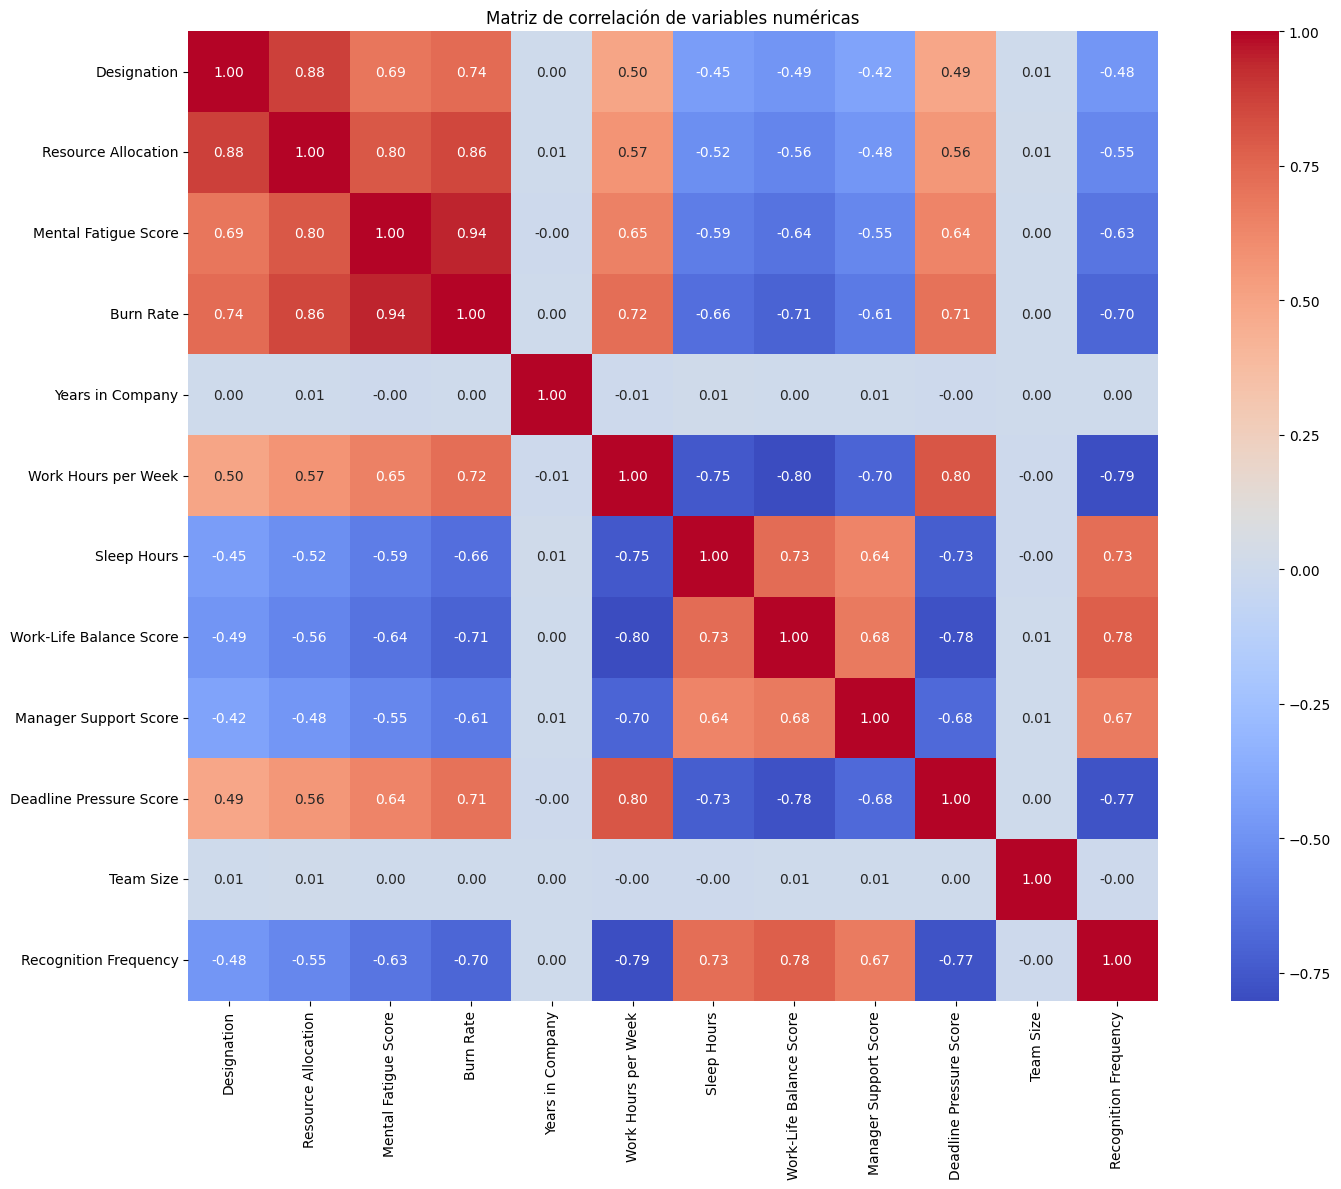

In [80]:
# Gráfico de relaciones entre variables
# Seleccionar solo columnas numéricas para la matriz de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

# Crear el heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            square=True)
plt.title('Matriz de correlación de variables numéricas')
plt.tight_layout()
plt.show()

In [108]:
# Revisar faltantes
print("\nValores faltantes:")
print(df.isna().sum())
# Calcular la proporció de de valores nulos en cada columna
print("\nPorcentaje faltantes:")
print(df.isna().mean().round(4)*100) # round(4) redondea a 4 decimales
# revisar duplicados
print(df.duplicated().sum())




Valores faltantes:
Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64

Porcentaje faltantes:
Employee ID                0.00
Date of Joining            0.00
Gender                     0.00
Company Type               0.00
WFH Setup Available        0.00
Designation                0.00
Resource Allocation        6.07
Mental Fatigue Score       9.31
Burn Rate                  4.94
Years in Company           0.00
Work Hours per Week        0.00
Sleep Hours                0.00
Work-Life Balanc

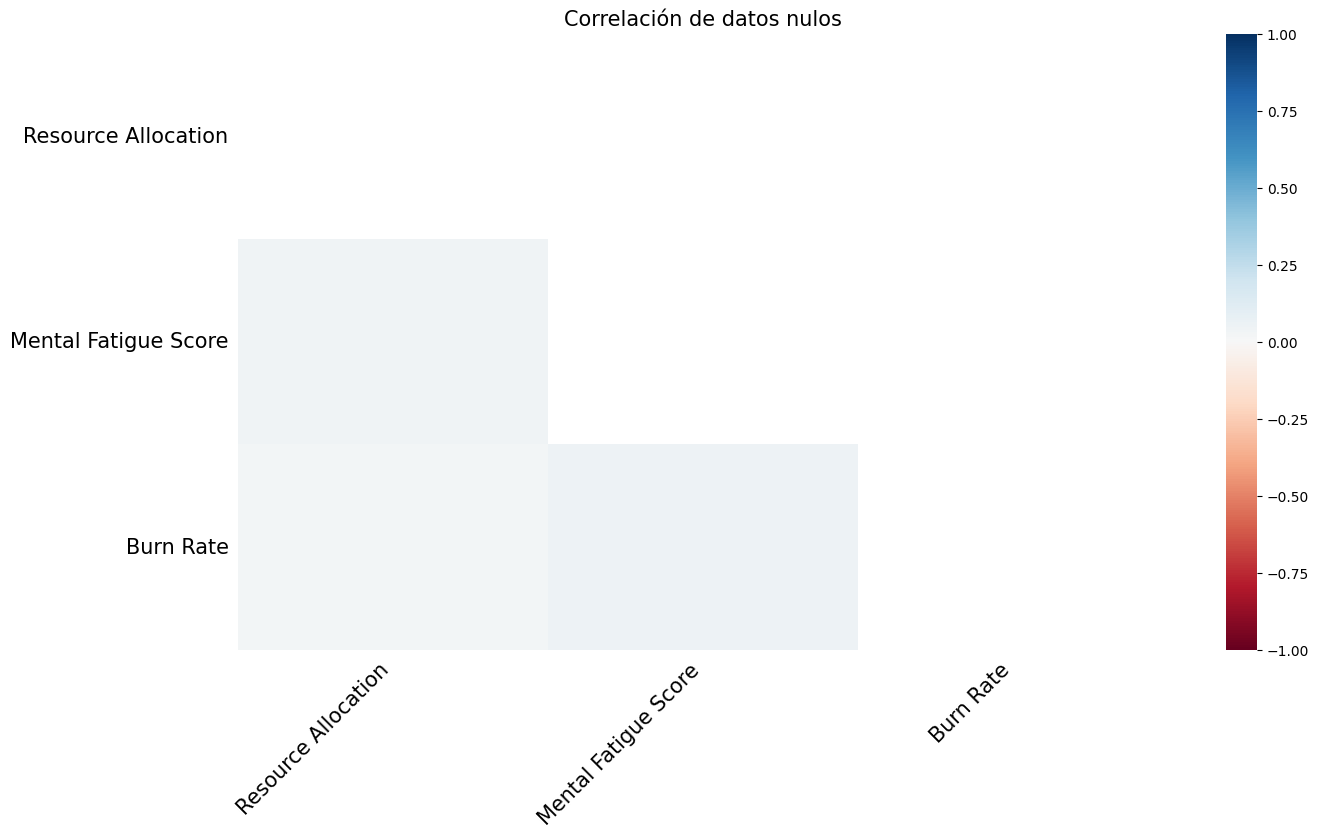

In [125]:
# Correlacion entre nulos 
msno.heatmap(df, fontsize=15, figsize=(15,8))
plt.title("Correlación de datos nulos", fontsize=15)
plt.show()

In [ ]:
# las filas con NaNs en una variable no coinciden con las filas con NaNs en las otras, 
# te indica que el patrón de valores nulos en esas variables no es dependiente 
# de que compartan las filas.En otras palabras:
# Las variables están relacionadas en sus valores observados (por ejemplo, si existe 
# una relación fuerte entre burn rate y mental fatigue score cuando ambos están presentes),
#Pero los NaNs no se producen en las mismas filas, sino de forma más aleatoria o independiente.

In [83]:
# Agrupar nulos por grupo
def nulos_por_grupo(df, grupo_cols, target_col):
    agrupar_nulos = (
        df.groupby(grupo_cols, observed=True)[target_col]
        .apply(lambda x: x.isnull().mean() * 100)
        .reset_index(name=f'porcentaje_nulos_{target_col}')
    )
    return agrupar_nulos

In [18]:
# Analisis para resource allocation
nulos_resource_por_gender = nulos_por_grupo(df, 'Gender', 'Resource Allocation')
nulos_resource_por_company = nulos_por_grupo(df, 'Company Type', 'Resource Allocation')
nulos_resource_por_wfh = nulos_por_grupo(df, 'WFH Setup Available', 'Resource Allocation')
nulos_resource_por_designation = nulos_por_grupo(df, 'Designation', 'Resource Allocation')

# Analisis para mental fatigue score
nulos_fatigue_por_gender = nulos_por_grupo(df, 'Gender', 'Mental Fatigue Score')
nulos_fatigue_por_company = nulos_por_grupo(df, 'Company Type', 'Mental Fatigue Score')
nulos_fatigue_por_wfh = nulos_por_grupo(df, 'WFH Setup Available', 'Mental Fatigue Score')
nulos_fatigue_por_designation = nulos_por_grupo(df, 'Designation', 'Mental Fatigue Score')

# Analisis para burn rate
nulos_burn_por_gender = nulos_por_grupo(df, 'Gender', 'Burn Rate')
nulos_burn_por_company = nulos_por_grupo(df, 'Company Type', 'Burn Rate')
nulos_burn_por_wfh = nulos_por_grupo(df, 'WFH Setup Available', 'Burn Rate')
nulos_burn_por_designation = nulos_por_grupo(df, 'Designation', 'Burn Rate')

print("="*50)
print("ANÁLISIS DE VALORES NULOS EN RESOURCE ALLOCATION")
print("="*50)
print("Por género:")
print(nulos_resource_por_gender)
print("\nPor tipo de empresa:")
print(nulos_resource_por_company)
print("\nPor WFH Setup:")
print(nulos_resource_por_wfh)
print("\nPor nivel de designación:")
print(nulos_resource_por_designation)

print("\n"+"="*50)
print("ANÁLISIS DE VALORES NULOS EN MENTAL FATIGUE SCORE")
print("="*50)
print("Por género:")
print(nulos_fatigue_por_gender)
print("\nPor tipo de empresa:")
print(nulos_fatigue_por_company)
print("\nPor WFH Setup:")
print(nulos_fatigue_por_wfh)
print("\nPor nivel de designación:")
print(nulos_fatigue_por_designation)

print("\n"+"="*50)
print("ANÁLISIS DE VALORES NULOS EN BURN RATE")
print("="*50)
print("Por género:")
print(nulos_burn_por_gender)
print("\nPor tipo de empresa:")
print(nulos_burn_por_company)
print("\nPor WFH Setup:")
print(nulos_burn_por_wfh)
print("\nPor nivel de designación:")
print(nulos_burn_por_designation)


ANÁLISIS DE VALORES NULOS EN RESOURCE ALLOCATION
Por género:
   Gender  porcentaje_nulos_Resource Allocation
0  Female                              5.970776
1    Male                              6.179672

Por tipo de empresa:
  Company Type  porcentaje_nulos_Resource Allocation
0      Product                              6.416572
1      Service                              5.885526

Por WFH Setup:
  WFH Setup Available  porcentaje_nulos_Resource Allocation
0                  No                              6.128107
1                 Yes                              6.021155

Por nivel de designación:
   Designation  porcentaje_nulos_Resource Allocation
0            0                              5.706702
1            1                              6.043843
2            2                              6.325778
3            3                              5.931495
4            4                              5.855291
5            5                              6.281407

ANÁLISIS DE VALORES

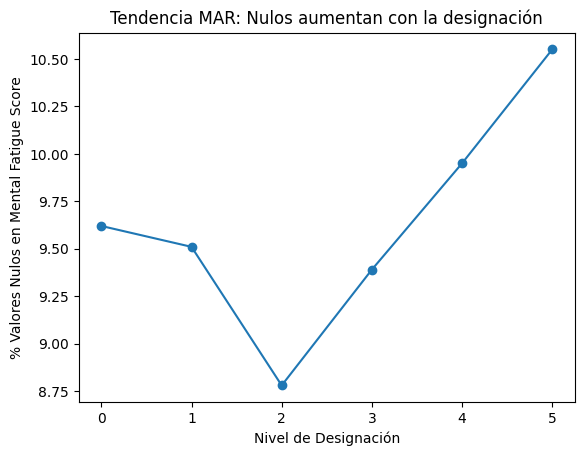

In [126]:
# Realizamos un gráfico de líneas para visualizar la tendencia de los valores nulos en el Mental Fatigue Score por nivel de designación,
# ya que se observa que la tendencia es creciente.
designation = [0, 1, 2, 3, 4, 5]
null_percentage = [9.62, 9.51, 8.78, 9.39, 9.95, 10.55]

plt.plot(designation, null_percentage, marker='o')
plt.xlabel("Nivel de Designación")
plt.ylabel("% Valores Nulos en Mental Fatigue Score")
plt.title("Tendencia MAR: Nulos aumentan con la designación")
plt.show()

In [85]:
# ==================================================
# CONCLUSIONES DEL ANÁLISIS DE VALORES NULOS (MCAR, MAR, MNAR)
# ==================================================

# --------------------------------------------------
# 1. Resource Allocation
# --------------------------------------------------
"""
CONCLUSIÓN: "MCAR" (Missing Completely at Random)

Justificación:
- Los porcentajes de valores nulos son consistentes en todos los grupos analizados:
  - Género: Female (5.97%) vs Male (6.18%) → Diferencia mínima (0.21%)
  - Tipo de empresa: Product (6.42%) vs Service (5.89%) → Diferencia pequeña (0.53%)
  - WFH Setup: No (6.13%) vs Yes (6.02%) → Diferencia insignificante (0.11%)
  - Designación: Todos los niveles oscilan entre 5.71% y 6.33% → Sin tendencia clara.
- No hay evidencia de que los nulos dependan de ninguna variable observada.
- Las diferencias pueden atribuirse a variabilidad aleatoria (ruido estadístico).
"""

# --------------------------------------------------
# 2. Mental Fatigue Score
# --------------------------------------------------
"""
CONCLUSIÓN: "MAR" (Missing at Random)

Justificación:
- Se observa una tendencia clara en la variable 'Designation':
  - Los nulos aumentan con el nivel jerárquico: 
    - Nivel 0: 9.62% → Nivel 5: 10.55% (Diferencia: +0.93%).
  - Esto sugiere que los empleados de mayor rango omiten reportar este dato con más frecuencia.
- Posibles causas (MAR):
  - Mayor carga laboral en puestos altos (menos tiempo para reportar).
  - Percepción de privacidad/confidencialidad en líderes.
- Otros grupos (género, empresa, WFH) no muestran diferencias significativas (<1%).
- No hay indicios de MNAR (no depende del valor no observado del score en sí).
"""

# --------------------------------------------------
# 3. Burn Rate
# --------------------------------------------------
"""
CONCLUSIÓN: "MCAR" (Missing Completely at Random)

Justificación:
- Las diferencias entre grupos son mínimas y no siguen un patrón:
  - Género: Female (4.69%) vs Male (5.21%) → Diferencia pequeña (0.52%)
  - Tipo de empresa: Product (5.24%) vs Service (4.78%) → Diferencia mínima (0.46%)
  - WFH Setup: No (4.96%) vs Yes (4.92%) → Diferencia irrelevante (0.04%)
  - Designación: Todos los niveles entre 4.51% y 5.53% → Sin tendencia clara.
- No existe relación discernible con variables observadas.
- Cumple con la definición de MCAR: ausencia aleatoria sin sesgos identificables.
"""

'\nCONCLUSIÓN: "MCAR" (Missing Completely at Random)\n\nJustificación:\n- Las diferencias entre grupos son mínimas y no siguen un patrón:\n  - Género: Female (4.69%) vs Male (5.21%) → Diferencia pequeña (0.52%)\n  - Tipo de empresa: Product (5.24%) vs Service (4.78%) → Diferencia mínima (0.46%)\n  - WFH Setup: No (4.96%) vs Yes (4.92%) → Diferencia irrelevante (0.04%)\n  - Designación: Todos los niveles entre 4.51% y 5.53% → Sin tendencia clara.\n- No existe relación discernible con variables observadas.\n- Cumple con la definición de MCAR: ausencia aleatoria sin sesgos identificables.\n'

In [127]:
le_gender = LabelEncoder()
le_company = LabelEncoder()
le_wfh = LabelEncoder()

df['gender_enc'] = le_gender.fit_transform(df['Gender'])
df['company_enc'] = le_company.fit_transform(df['Company Type'])
df['wfh_enc'] = le_wfh.fit_transform(df['WFH Setup Available'])

# Verificación
print("Variables codificadas:")
print(df[['gender_enc', 'company_enc', 'wfh_enc']].head())

Variables codificadas:
   gender_enc  company_enc  wfh_enc
0           0            1        0
1           1            1        1
2           0            0        1
3           1            1        1
4           0            1        0


Distribución original vs imputada:
           Original      Imputado
count  21369.000000  22750.000000
mean       4.481398      4.452176
std        2.047211      1.987427
min        1.000000      1.000000
25%        3.000000      3.000000
50%        4.000000      4.000000
75%        6.000000      6.000000
max       10.000000     10.000000


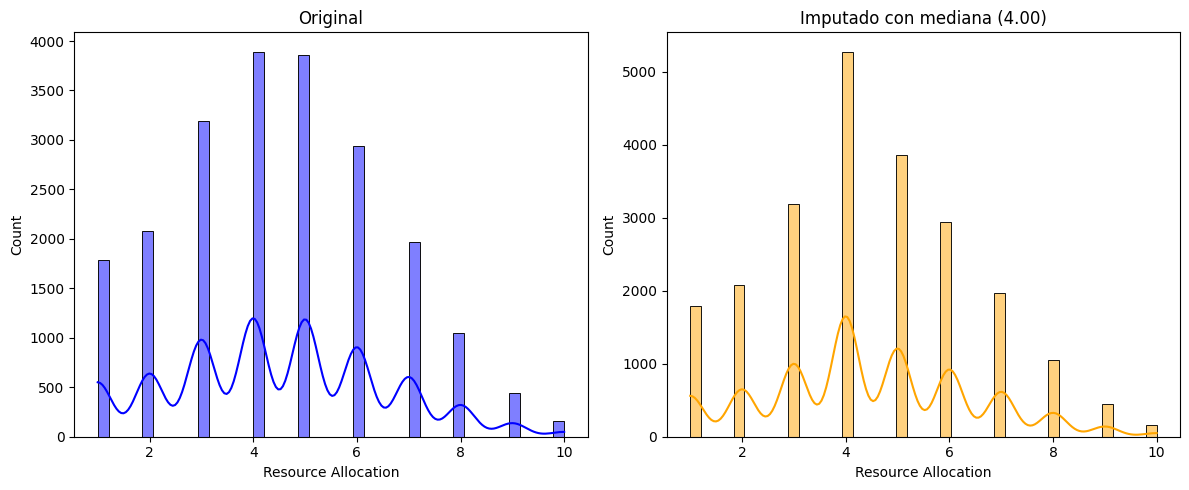


Valores faltantes después de la imputación:
0


In [128]:
# Resource Allocation, imputacion por mediana
median_val = df['Resource Allocation'].median()

# Store original values for comparison
original_values = df['Resource Allocation'].copy()

# Replace values in the original column
df['Resource Allocation'] = df['Resource Allocation'].fillna(median_val)

# Compare distributions
print(f"Distribución original vs imputada:")
print(pd.DataFrame({
    'Original': original_values,
    'Imputado': df['Resource Allocation']
}).describe())

# Visualización
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
sns.histplot(original_values, kde=True, color='blue')
plt.title('Original')

# Imputed distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Resource Allocation'], kde=True, color='orange')
plt.title(f'Imputado con mediana ({median_val:.2f})')

plt.tight_layout()
plt.show()

# Verify no missing values remain
print("\nValores faltantes después de la imputación:")
print(df['Resource Allocation'].isnull().sum())

In [ ]:
# Analisis post imputacion de resource allocation
# Vemos que no se observa un cambio significativo en la distribucion de la variable, lo que indica que la imputacion fue correcta.

Estadísticas - Original
count    20633.000000
mean         5.728188
std          1.920839
min          0.000000
25%          4.600000
50%          5.900000
75%          7.100000
max         10.000000
Name: Original, dtype: float64

Estadísticas - Imputada
count    22750.000000
mean         5.724845
std          1.912708
min          0.000000
25%          4.500000
50%          5.877126
75%          7.100000
max         11.049168
Name: Imputado, dtype: float64


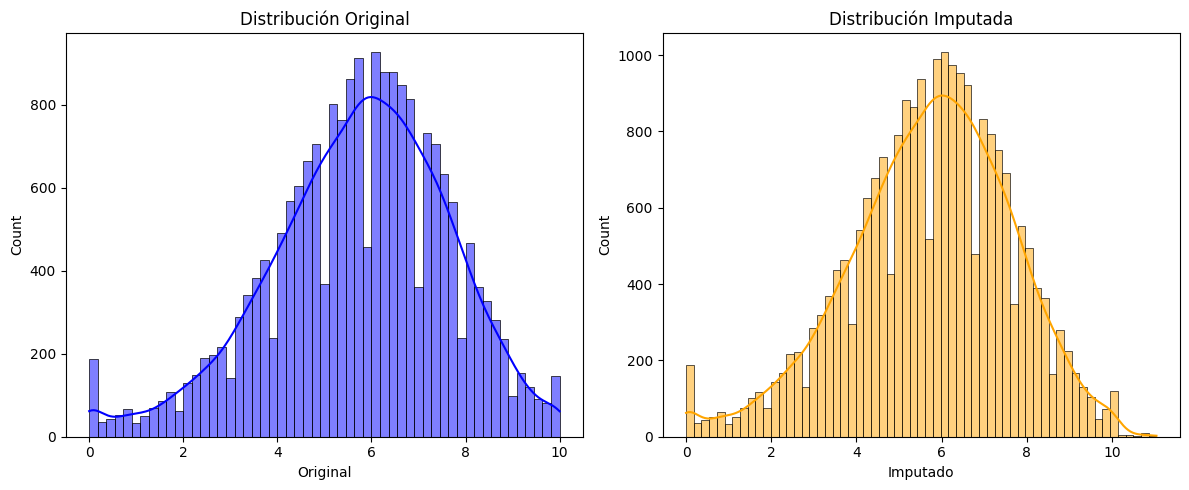


Valores faltantes después de la imputación:
0


In [129]:
# Mental Fatigue Score (9.31% faltantes - MAR)
# Análisis previo:
# 1. Guardar valores originales antes de imputar
original_values = df['Mental Fatigue Score'].copy()

# 2. Realizar la imputación (ya lo hiciste)
vars_para_imputar = [
    'Mental Fatigue Score', 'Burn Rate', 'Resource Allocation', 'Work Hours per Week', 'Designation'
]
df_mice = df[vars_para_imputar].copy()

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = imputer.fit_transform(df_mice)
df_imputed = pd.DataFrame(df_imputed, columns=vars_para_imputar)

# 3. Reemplazar en el DataFrame original
df['Mental Fatigue Score'] = df_imputed['Mental Fatigue Score']

# 4. Comparación visual y estadística

# Crear DataFrame para comparación
comparison_df = pd.DataFrame({
    'Original': original_values,
    'Imputado': df['Mental Fatigue Score']
})

# Mostrar estadísticas descriptivas
print("Estadísticas - Original")
print(comparison_df['Original'].describe())

print("\nEstadísticas - Imputada")
print(comparison_df['Imputado'].describe())

# Visualización: distribución original vs imputada
plt.figure(figsize=(12, 5))
# Distribución original
plt.subplot(1, 2, 1)
sns.histplot(comparison_df['Original'], kde=True, color='blue')
plt.title('Distribución Original')

# Distribución imputada
plt.subplot(1, 2, 2)
sns.histplot(comparison_df['Imputado'], kde=True, color='orange')
plt.title('Distribución Imputada')

plt.tight_layout()
plt.show()

# Verify no missing values remain
print("\nValores faltantes después de la imputación:")
print(df['Mental Fatigue Score'].isnull().sum())

Estadísticas - Burn Rate Original vs Imputado
           Original      Imputado
count  21626.000000  22750.000000
mean       0.452005      0.450042
std        0.198226      0.196913
min        0.000000     -0.071651
25%        0.310000      0.310000
50%        0.450000      0.450000
75%        0.590000      0.580000
max        1.000000      1.000000


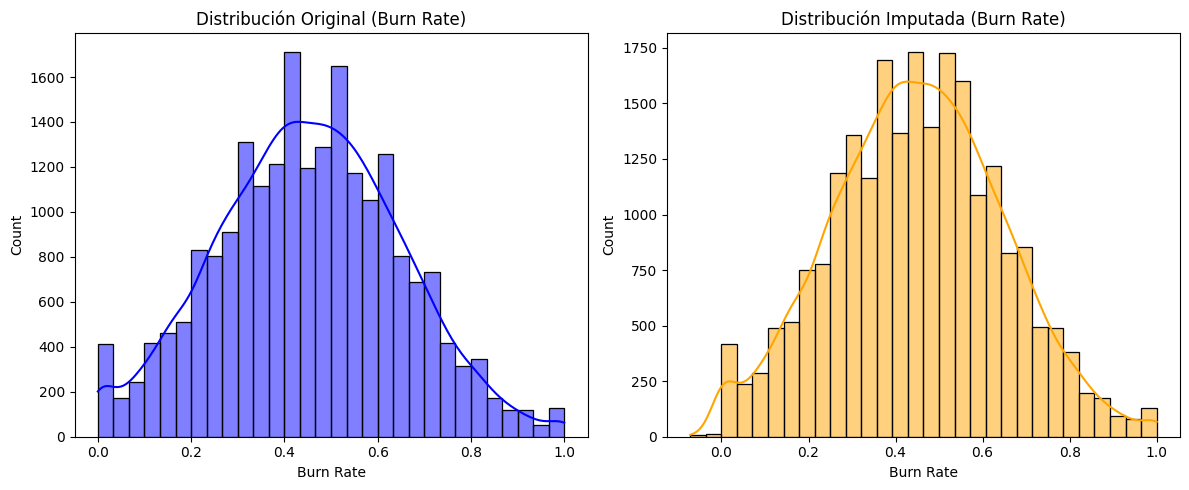


Valores faltantes en Burn Rate después de imputación: 0


In [130]:
# Imputacion de valores nulos para burn rate
original_burn = df['Burn Rate'].copy()

# 2. Definir variables relevantes para la imputación
# (Incluyendo correlaciones positivas y negativas)
vars_para_imputar = [
    'Burn Rate',                  # Variable objetivo
    'Mental Fatigue Score',       # Correlación +0.94
    'Resource Allocation',        # Correlación +0.86
    'Designation',                # Correlación +0.74
    'Work Hours per Week',        # Correlación positiva
    'Work-Life Balance Score',    # Correlación -0.71
    'Recognition Frequency'       # Correlación negativa
]

# 3. Crear subconjunto para MICE
# Aqui no se escalaron las variables ya que El
# estimador BayesianRidge (usado por defecto en IterativeImputer) estandariza internamente las variables durante el entrenamiento
df_mice = df[vars_para_imputar].copy()
imputer = IterativeImputer(max_iter=10, random_state=42)
df_imputed = imputer.fit_transform(df_mice)
df_imputed = pd.DataFrame(df_imputed, columns=vars_para_imputar)

# 6. Reemplazar en el DataFrame original
df['Burn Rate'] = df_imputed['Burn Rate']

# ==================================================
# VALIDACIÓN Y ANÁLISIS POST-IMPUTACIÓN
# ==================================================

# 1. Comparación estadística
print("Estadísticas - Burn Rate Original vs Imputado")
print(pd.DataFrame({
    'Original': original_burn.describe(),
    'Imputado': df['Burn Rate'].describe()
}))

# 2. Distribuciones comparadas
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(original_burn.dropna(), kde=True, color='blue', bins=30)
plt.title('Distribución Original (Burn Rate)')

plt.subplot(1, 2, 2)
sns.histplot(df['Burn Rate'], kde=True, color='orange', bins=30)
plt.title('Distribución Imputada (Burn Rate)')
plt.tight_layout()
plt.show()

# 3. Verificar que no quedan nulos
print("\nValores faltantes en Burn Rate después de imputación:", df['Burn Rate'].isnull().sum())


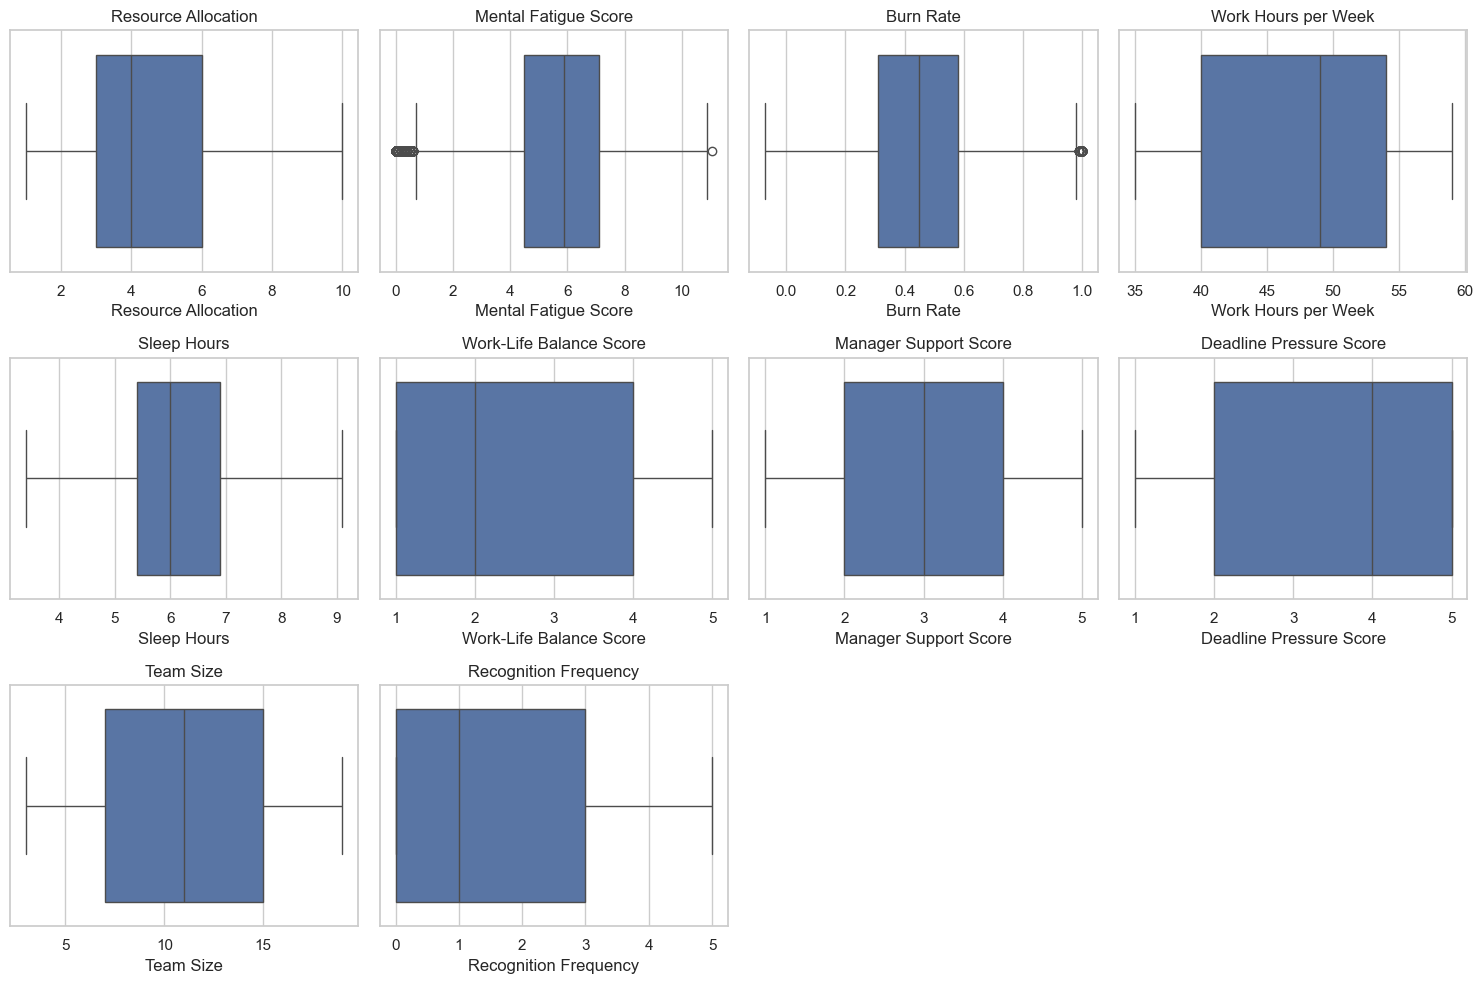

In [138]:
# Analisis de outliers
# comenzamos con los boxplots para tener una primera visualización de los outliers
# Lista de variables numéricas a analizar para outliers
variables = [
    'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate',
    'Work Hours per Week', 'Sleep Hours', 'Work-Life Balance Score',
    'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency'
]

# Crear la figura con subplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

In [ ]:
outliers_burn = df[outliers['Burn Rate']]

# Analizar por allocation, empresa o designación
print("Outliers de Burn Rate por resource allocation:\n", outliers_burn['Resource Allocation'].value_counts())
print("\nOutliers de Burn Rate por tipo de empresa:\n", outliers_burn['Company Type'].value_counts())
print("\nOutliers de Burn Rate por designación:\n", outliers_burn['Designation'].value_counts())
print("\nOutliers de Burn Rate por work hours peer week:\n", outliers_burn['Work Hours per Week'].value_counts())

Outliers de Burn Rate por resource allocation:
 Resource Allocation
10.0    36
9.0     34
1.0     19
8.0     12
4.0     10
7.0      2
2.0      1
Name: count, dtype: int64

Outliers de Burn Rate por tipo de empresa:
 Company Type
Service    76
Product    38
Name: count, dtype: int64

Outliers de Burn Rate por designación:
 Designation
5    45
4    40
1    12
0     9
3     8
Name: count, dtype: int64

Outliers de Burn Rate por work hours peer week:
 Work Hours per Week
48    12
50    12
55    11
51    11
57    10
52     7
53     6
59     6
49     5
58     5
54     4
42     4
56     4
38     3
36     3
40     2
41     2
35     2
37     2
43     2
44     1
Name: count, dtype: int64


In [140]:
# Excluir columnas problemáticas
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
exclude_cols = ['gender_enc', 'company_enc', 'wfh_enc', 'Years in Company']
numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
df_numeric = df[numeric_cols]

# 2. Calcular IQR y límites
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Ajustar límites para variables con escalas conocidas
bounds_adjustments = {
    'Burn Rate': (0.0, 1.0),
    'Mental Fatigue Score': (0.0, 10.0),
    'Work-Life Balance Score': (1.0, 5.0),
    'Manager Support Score': (1.0, 5.0),
    'Deadline Pressure Score': (1.0, 5.0),
    'Recognition Frequency': (0.0, 5.0)
}

for var, (min_val, max_val) in bounds_adjustments.items():
    lower_bound[var] = max(lower_bound[var], min_val)
    upper_bound[var] = min(upper_bound[var], max_val)

# 4. Identificar outliers válidos
outliers = (df_numeric < lower_bound) | (df_numeric > upper_bound)

# 5. Resumen de outliers
outlier_summary = pd.DataFrame({
    'Variable': numeric_cols,
    'Total Outliers': outliers.sum(),
    'Límite Inferior': lower_bound.values,
    'Límite Superior': upper_bound.values
})

print("Resumen de Outliers:")
print(outlier_summary.to_string(index=False))

Resumen de Outliers:
               Variable  Total Outliers  Límite Inferior  Límite Superior
            Designation               0            -2.00            6.000
    Resource Allocation               0            -1.50           10.500
   Mental Fatigue Score             316             0.60           10.000
              Burn Rate             114             0.00            0.985
    Work Hours per Week               0            19.00           75.000
            Sleep Hours               0             3.15            9.150
Work-Life Balance Score               0             1.00            5.000
  Manager Support Score               0             1.00            5.000
Deadline Pressure Score               0             1.00            5.000
              Team Size               0            -5.00           27.000
  Recognition Frequency               0             0.00            5.000


Resumen Final de Outliers:
               Variable  Total Outliers  Límite Inferior  Límite Superior
            Designation               0              0.0            5.000
    Resource Allocation               0              1.0           10.000
   Mental Fatigue Score             316              0.6           10.000
              Burn Rate             114              0.0            0.985
    Work Hours per Week               0             35.0           59.000
            Sleep Hours               0              3.4            9.100
Work-Life Balance Score               0              1.0            5.000
  Manager Support Score               0              1.0            5.000
Deadline Pressure Score               0              1.0            5.000
              Team Size               0              3.0           19.000
  Recognition Frequency               0              0.0            5.000


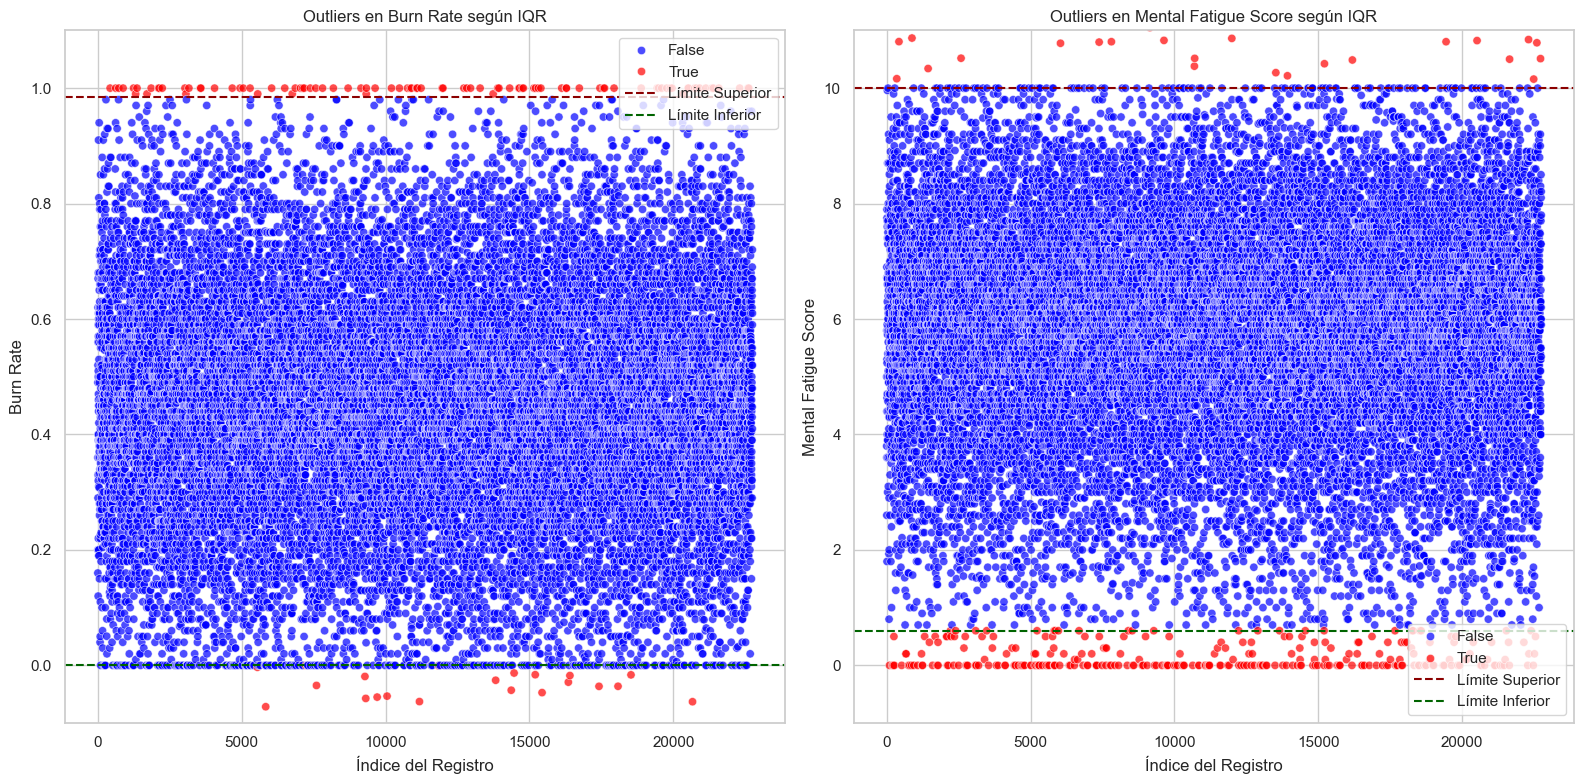

In [144]:
# Lo anterior me genera valores que no tienen sentido, como por ejemplo limites negativos para variables que no pueden ser negativas.
# Corrección de límites para variables con escalas conocidas

# Excluir columnas no relevantes para análisis numérico
exclude_cols = ['Employee ID', 'Date of Joining', 'Gender', 'Company Type', 
                'WFH Setup Available', 'gender_enc', 'company_enc', 'wfh_enc', 
                'total_outliers', 'Years in Company']

numeric_cols = [col for col in df.select_dtypes(include=['number']).columns 
                if col not in exclude_cols]
df_numeric = df[numeric_cols]

# 2. Definir límites teóricos y reales para cada variable
bounds_adjustments = {
    'Designation': (0, 5),               # Rango real: 0-5
    'Resource Allocation': (1, 10),      # Rango teórico: 1-10
    'Mental Fatigue Score': (0, 10),     # Escala teórica
    'Burn Rate': (0.0, 1.0),             # Rango teórico
    'Work Hours per Week': (35, 59),     # Rango observado
    'Sleep Hours': (3.4, 9.1),           # Mín/Max real
    'Work-Life Balance Score': (1, 5),   # Escala ordinal
    'Manager Support Score': (1, 5),     # Escala ordinal
    'Deadline Pressure Score': (1, 5),   # Escala ordinal
    'Team Size': (3, 19),                # Rango observado
    'Recognition Frequency': (0, 5)      # Escala ordinal
}

# 3. Función para ajustar límites
def adjust_bounds(var, lower, upper):
    data_min = df[var].min()
    data_max = df[var].max()
    theoretical_min, theoretical_max = bounds_adjustments.get(var, (data_min, data_max))
    
    new_lower = max(lower, theoretical_min, data_min)
    new_upper = min(upper, theoretical_max, data_max)
    
    return new_lower, new_upper

# 4. Cálculo de IQR y ajuste de límites
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aplicar ajustes a todas las variables
adjusted_lower = pd.Series(index=lower_bound.index)
adjusted_upper = pd.Series(index=upper_bound.index)

for var in numeric_cols:
    l, u = adjust_bounds(var, lower_bound[var], upper_bound[var])
    adjusted_lower[var] = l
    adjusted_upper[var] = u

# 5. Identificación de outliers válidos
outliers = (df_numeric < adjusted_lower) | (df_numeric > adjusted_upper)

# 6. Resumen de outliers
outlier_summary = pd.DataFrame({
    'Variable': numeric_cols,
    'Total Outliers': outliers.sum(),
    'Límite Inferior': adjusted_lower.values,
    'Límite Superior': adjusted_upper.values
})

print("Resumen Final de Outliers:")
print(outlier_summary.to_string(index=False))

plt.figure(figsize=(16, 8))

# Scatterplot para Burn Rate
plt.subplot(1, 2, 1)
sns.scatterplot(x=df.index, y=df['Burn Rate'], 
                hue=outliers['Burn Rate'], 
                palette={True: 'red', False: 'blue'}, 
                alpha=0.7)
plt.axhline(adjusted_upper['Burn Rate'], color='darkred', linestyle='--', label='Límite Superior')
plt.axhline(adjusted_lower['Burn Rate'], color='darkgreen', linestyle='--', label='Límite Inferior')
plt.title('Outliers en Burn Rate según IQR')
plt.xlabel('Índice del Registro')
plt.ylabel('Burn Rate')
plt.ylim(bounds_adjustments['Burn Rate'][0] - 0.1, bounds_adjustments['Burn Rate'][1] + 0.1)
plt.legend()

# Scatterplot para Mental Fatigue Score
plt.subplot(1, 2, 2)
sns.scatterplot(x=df.index, y=df['Mental Fatigue Score'], 
                hue=outliers['Mental Fatigue Score'], 
                palette={True: 'red', False: 'blue'}, 
                alpha=0.7)
plt.axhline(adjusted_upper['Mental Fatigue Score'], color='darkred', linestyle='--', label='Límite Superior')
plt.axhline(adjusted_lower['Mental Fatigue Score'], color='darkgreen', linestyle='--', label='Límite Inferior')
plt.title('Outliers en Mental Fatigue Score según IQR')
plt.xlabel('Índice del Registro')
plt.ylabel('Mental Fatigue Score')
plt.ylim(bounds_adjustments['Mental Fatigue Score'][0] - 1, bounds_adjustments['Mental Fatigue Score'][1] + 1)
plt.legend()

# Ajustar layout
plt.tight_layout()
plt.show()


In [142]:
outliers_burn = df[outliers['Burn Rate']]

# Analizar por allocation, empresa o designación
print("Outliers de Burn Rate por resource allocation:\n", outliers_burn['Resource Allocation'].value_counts())
print("\nOutliers de Burn Rate por tipo de empresa:\n", outliers_burn['Company Type'].value_counts())
print("\nOutliers de Burn Rate por designación:\n", outliers_burn['Designation'].value_counts())
print("\nOutliers de Burn Rate por work hours peer week:\n", outliers_burn['Work Hours per Week'].value_counts())

Outliers de Burn Rate por resource allocation:
 Resource Allocation
10.0    36
9.0     34
1.0     19
8.0     12
4.0     10
7.0      2
2.0      1
Name: count, dtype: int64

Outliers de Burn Rate por tipo de empresa:
 Company Type
Service    76
Product    38
Name: count, dtype: int64

Outliers de Burn Rate por designación:
 Designation
5    45
4    40
1    12
0     9
3     8
Name: count, dtype: int64

Outliers de Burn Rate por work hours peer week:
 Work Hours per Week
48    12
50    12
55    11
51    11
57    10
52     7
53     6
59     6
49     5
58     5
54     4
42     4
56     4
38     3
36     3
40     2
41     2
35     2
37     2
43     2
44     1
Name: count, dtype: int64


In [1]:
# 1. Estadísticas iniciales de referencia
print("Estadísticas Originales:")
print(df[['Burn Rate', 'Mental Fatigue Score']].describe())

# 2. Máscara compuesta de outliers
outliers_mask = outliers['Burn Rate'] | outliers['Mental Fatigue Score']
print(f"\nTotal de registros con al menos un outlier: {outliers_mask.sum()}")

# 3. Preparación de datos para KNN incluyendo variables relacionadas
df_knn = df.copy()
df_knn.loc[outliers_mask, ['Burn Rate', 'Mental Fatigue Score']] = np.nan

# 4. Imputación con variables contextualmente relevantes
imputer = KNNImputer(n_neighbors=5)
cols = [
    'Burn Rate', 
    'Mental Fatigue Score', 
    'Resource Allocation',
    'Work Hours per Week',
    'Designation'  # ¡Importante incluir!
]

df_knn[cols] = imputer.fit_transform(df_knn[cols])

# 5. Validación de resultados
print("\nComparación Post-Imputación:")
print(pd.DataFrame({
    'Original Mean': df[['Burn Rate', 'Mental Fatigue Score']].mean(),
    'Imputed Mean': df_knn[['Burn Rate', 'Mental Fatigue Score']].mean(),
    'Delta (%)': (df_knn[['Burn Rate', 'Mental Fatigue Score']].mean() - df[['Burn Rate', 'Mental Fatigue Score']].mean())/df[['Burn Rate', 'Mental Fatigue Score']].mean()*100
}).round(2))

# 6. Verificación de correlación preservada
original_corr = df[['Burn Rate', 'Mental Fatigue Score']].corr().iloc[0,1]
imputed_corr = df_knn[['Burn Rate', 'Mental Fatigue Score']].corr().iloc[0,1]
print(f"\nCorrelación Original: {original_corr:.2f}")
print(f"Correlación Post-Imputación: {imputed_corr:.2f}")
print(f"Diferencia: {abs(original_corr - imputed_corr):.2f}")

# 7. Detección de nuevos outliers (validación)
Q1_post = df_knn[['Burn Rate', 'Mental Fatigue Score']].quantile(0.25)
Q3_post = df_knn[['Burn Rate', 'Mental Fatigue Score']].quantile(0.75)
IQR_post = Q3_post - Q1_post

outliers_post = (
    (df_knn[['Burn Rate', 'Mental Fatigue Score']] < (Q1_post - 1.5*IQR_post)) | 
    (df_knn[['Burn Rate', 'Mental Fatigue Score']] > (Q3_post + 1.5*IQR_post))
)

print("\nOutliers remanentes:")
print(outliers_post.sum())

Estadísticas Originales:


NameError: name 'df' is not defined